<a href="https://colab.research.google.com/github/KatiaItzelCortes/EDP/blob/main/Integral%20de%20Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.integrals import integrate
from sympy import oo, sin, cos, pi, Abs
from scipy.integrate import quad # Necesario para la integración numérica en la parte c)

In [7]:
# Habilitar la impresión LaTeX para SymPy
sp.init_printing(use_latex='mathjax')

# Definir las variables simbólicas
x, w = sp.symbols('x w')

--- Parte a) Graficando la función pulso unitario ---


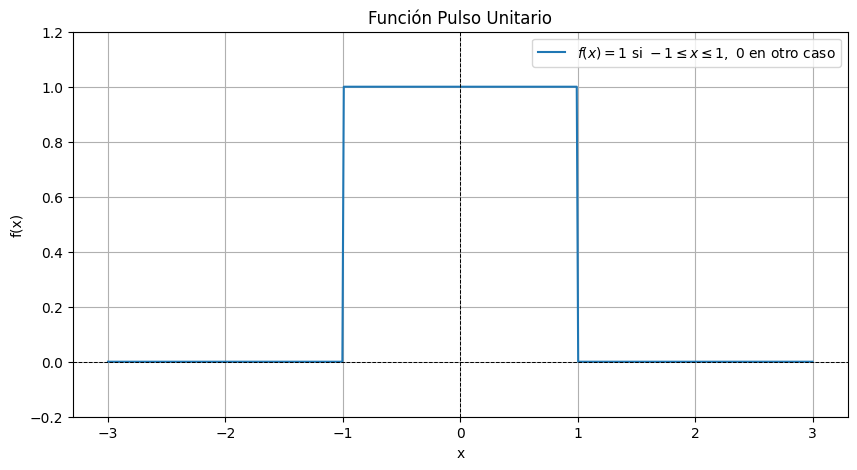

In [8]:
# --- Parte a) Graficar la función pulso unitario ---
print("Parte a) Graficando la función pulso unitario ---")

def f(x):
    """Define la función pulso unitario."""
    if -1 <= x <= 1:
        return 1
    else:
        return 0

# Crear datos para la gráfica
valores_x = np.linspace(-3, 3, 500)
valores_y = np.array([f(x) for x in valores_x])

plt.figure(figsize=(10, 5))
plt.plot(valores_x, valores_y, label=r'$f(x) = 1 \text{ si } -1 \leq x \leq 1, \text{ 0 en otro caso}$')
plt.title('Función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.ylim(-0.2, 1.2)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)
plt.show()

In [11]:
# Parte b) Calcular la representación integral de Fourier ---
print("Parte b) Calculando la representación integral de Fourier ---")

# La representación integral de Fourier está dada por:
# f(x) = (1/pi) * integral_0^infinito [A(w)cos(wx) + B(w)sin(wx)] dw
# donde A(w) = integral_-infinito^infinito f(v)cos(wv)dv
# y B(w) = integral_-infinito^infinito f(v)sin(wv)dv

# Para nuestra función pulso f(x) = 1 para -1 <= x <= 1, y 0 en otro caso:
# A(w) = integral_-1^1 (1)cos(wx)dx
# B(w) = integral_-1^1 (1)sin(wx)dx

# Calcular A(w) simbólicamente
A_w = integrate(sp.cos(w * x), (x, -1, 1))
print(f"A(w) = {A_w}")
display(sp.Eq(sp.Function('A')(w), A_w)) # Mostrar en formato matemático

# Calcular B(w) simbólicamente
B_w = integrate(sp.sin(w * x), (x, -1, 1))
print(f"B(w) = {B_w}")
display(sp.Eq(sp.Function('B')(w), B_w)) # Mostrar en formato matemático



--- Parte b) Calculando la representación integral de Fourier ---
A(w) = Piecewise((2*sin(w)/w, (w > -oo) & (w < oo) & Ne(w, 0)), (2, True))


       ⎧2⋅sin(w)                            
       ⎪────────  for w > -∞ ∧ w < ∞ ∧ w ≠ 0
A(w) = ⎨   w                                
       ⎪                                    
       ⎩   2              otherwise         

B(w) = 0


B(w) = 0

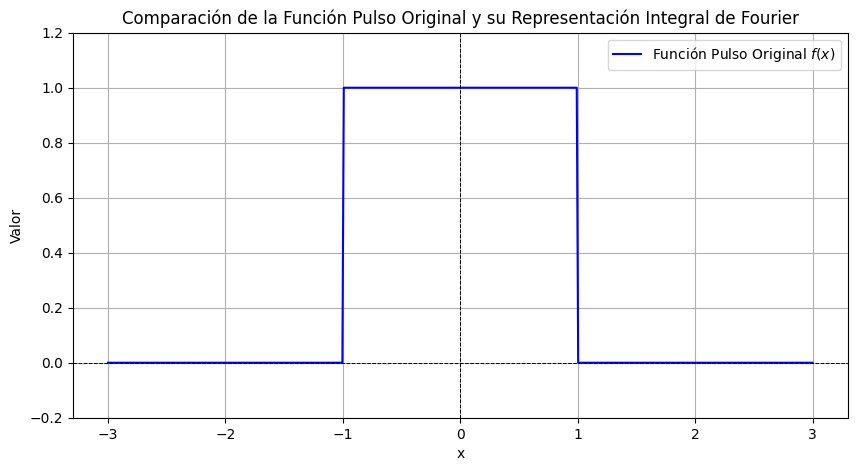

La representación integral de Fourier de $f(x)$ es:


       ∞                                                  
       ⌠                                                  
       ⎮ ⎧2⋅sin(w)⋅cos(w⋅x)                               
       ⎮ ⎪─────────────────  for w > -∞ ∧ w < ∞ ∧ w ≠ 0   
       ⎮ ⎨        w                                     dw
       ⎮ ⎪                                                
       ⎮ ⎩   2⋅cos(w⋅x)              otherwise            
       ⌡                                                  
       0                                                  
f(x) = ───────────────────────────────────────────────────
                                π                         

In [12]:
# Dado que B(w) es 0 (sin(wx) es una función impar integrada sobre un intervalo simétrico),
# la integral de Fourier se simplifica a:
# f(x) = (1/pi) * integral_0^infinito [A(w)cos(wx)] dw
# f(x) = (1/pi) * integral_0^infinito [(2*sin(w))/w * cos(wx)] dw

# Para esta parte, el "resultado" es la forma de la integral de Fourier.
# La gráfica comparativa se hará en la parte c) con las aproximaciones.

plt.figure(figsize=(10, 5))
plt.plot(valores_x, valores_y, label='Función Pulso Original $f(x)$', color='blue')
plt.title('Comparación de la Función Pulso Original y su Representación Integral de Fourier')
plt.xlabel('x')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.ylim(-0.2, 1.2)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)
plt.show()

print(r"La representación integral de Fourier de $f(x)$ es:")
# Mostramos la integral de Fourier en su forma simbólica.
display(sp.Eq(sp.Function('f')(x), (1/pi) * sp.Integral(A_w * sp.cos(w*x), (w, 0, oo))))



Parte c) Aproximando la integral de Fourier con límites superiores finitos 
Calculando aproximación para a = 8
Calculando aproximación para a = 16
Calculando aproximación para a = 32


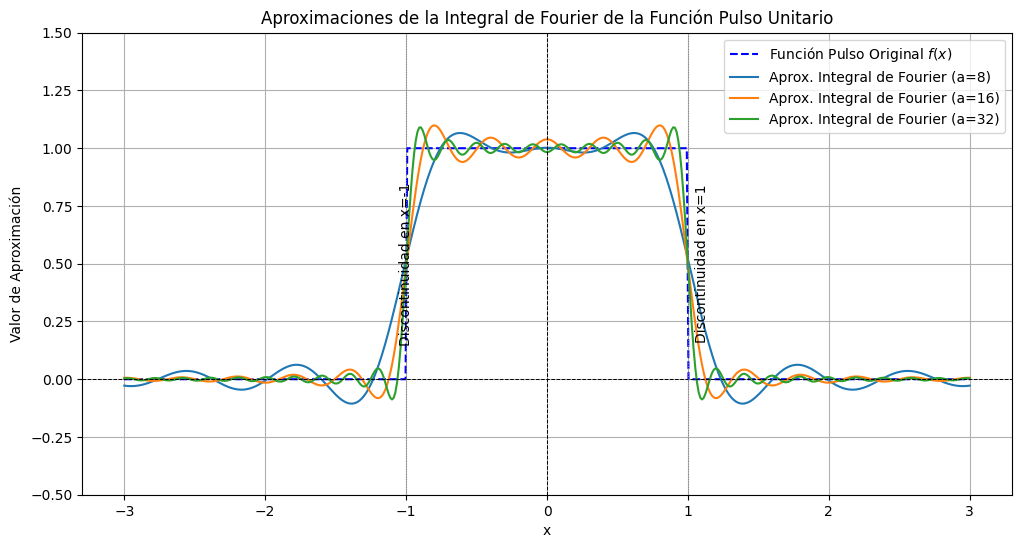

In [21]:
# --- Parte c) Aproximaciones a la integral impropia ---
print("Parte c) Aproximando la integral de Fourier con límites superiores finitos ")

# Vamos a graficar la función:
# f_aprox(x, a) = (1/pi) * integral_0^a [(2*sin(w))/w * cos(wx)] dw

limites_aprox = [8, 16, 32]
plt.figure(figsize=(12, 6))
plt.plot(valores_x, valores_y, label='Función Pulso Original $f(x)$', color='blue', linestyle='--')

# Función para la integración numérica
def fourier_aprox_numerica(valor_x_num, limite_superior):
    integrando_para_quad = lambda omega: (2/np.pi) * (np.sin(omega)/omega) * np.cos(omega * valor_x_num)
    resultado, error = quad(integrando_para_quad, 0, limite_superior)
    return resultado
# Iterar a través de los límites de aproximación y graficar en el mismo panel
for valor_a in limites_aprox:
    print(f"Calculando aproximación para a = {valor_a}")
    valores_y_aprox = np.array([fourier_aprox_numerica(val, valor_a) for val in valores_x])
    plt.plot(valores_x, valores_y_aprox, label=f'Aprox. Integral de Fourier (a={valor_a})')


plt.title('Aproximaciones de la Integral de Fourier de la Función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('Valor de Aproximación')
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.5) # Ajustar límites y para observar mejor el fenómeno de Gibbs
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.7)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=1, color='gray', linestyle=':', linewidth=0.7)
plt.axvline(x=-1, color='gray', linestyle=':', linewidth=0.7)
plt.text(1.05, 0.5, 'Discontinuidad en x=1', rotation=90, va='center')
plt.text(-1.05, 0.5, 'Discontinuidad en x=-1', rotation=90, va='center')
plt.show()
